In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale
%autoreload 2

UsageError: Line magic function `%autoreload` not found.


In [4]:
base = pd.read_csv(r"C:\Users\PedroHenriquePereira\Documents\Pessoal\Master\Neurocomputaça\Atividade 3 - Ensaios de MLP, RNN E SOM\Cost_of_living_index.csv")

In [19]:
base.head(1)

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,"Hamilton, Bermuda",137.56,103.03,121.21,126.56,151.77,114.19


In [8]:
features= [
 'Cost of Living Index',
 'Rent Index',
 'Cost of Living Plus Rent Index',
 'Groceries Index',
 'Restaurant Price Index',
 'Local Purchasing Power Index']

In [38]:

X = base[features].values
X = scale(X)

size = 80
som = MiniSom(size, size, len(X[0]),neighborhood_function='gaussian', sigma=1.5, random_seed=1)
som.pca_weights_init(X)
som.train_random(X, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 535.70 it/s - 0:00:00 left   - quantization error: 0.3231288307567428


In [39]:
country_map = som.labels_map(X, base["City"])

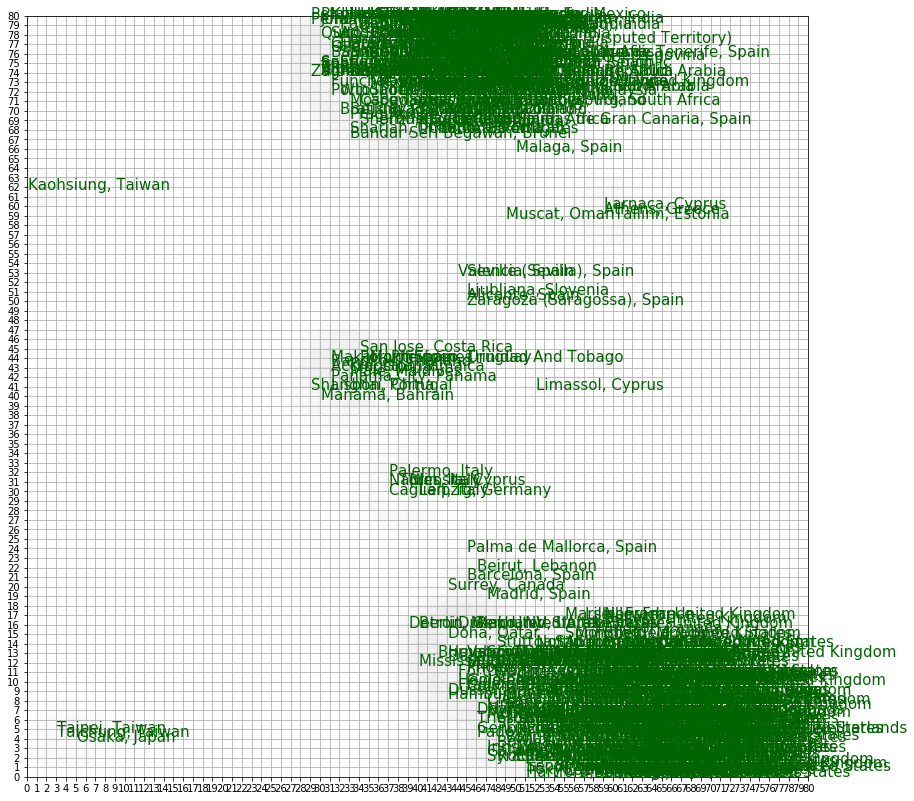

In [40]:
plt.figure(figsize=(14, 14))
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, c, color="darkgreen", fontsize=15)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()